## III. From ballistic motion to Brownian diffusion


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# values

R = 1e-6 # radius (m)
m=11e-15 # mass(kg)
T= 300 # temperature (K)
eta= 0.001 # viscosity (Nsm^-2)
tau= 0.6e-6 # momentum relaxation time (s)
gamma= 6*np.pi*eta*R # friction coefficient (kg/s)

KB= 1.38e-23 # Boltzmann cnt (J/K)

D= KB*T/gamma # diffusion coefficient (m^2/s)

In [3]:
Dt=10e-9 # time step (s)

#### Times smaller or comparable to the inertial time t $\lesssim$ $\tau$

In [4]:
Time=tau

N = int(Time / Dt)
t = np.linspace(0, Time, N)
w = np.random.normal(0, 1, N)

# Inertial regime
x_inertial = np.zeros(N)
x_inertial[0] = 0
x_inertial[1] = 0

for i in range(2, N):
        x_inertial[i] = ((2 + Dt * gamma / m) / (1 + Dt * gamma / m)) * x_inertial[i-1] - (1 / (1 + Dt * gamma / m)) * x_inertial[i-2] + (np.sqrt(2 * KB * T * gamma) / (m*(1 + Dt * gamma/m))) * w[i] * Dt**(3/2)

# Diffusive regime
x_diffusive = np.zeros(N)
x_diffusive[0] = 0

for i in range(1, N):
    x_diffusive[i]=x_diffusive[i-1] + np.sqrt(2*D*Dt)*w[i]

In [5]:
time=t/tau

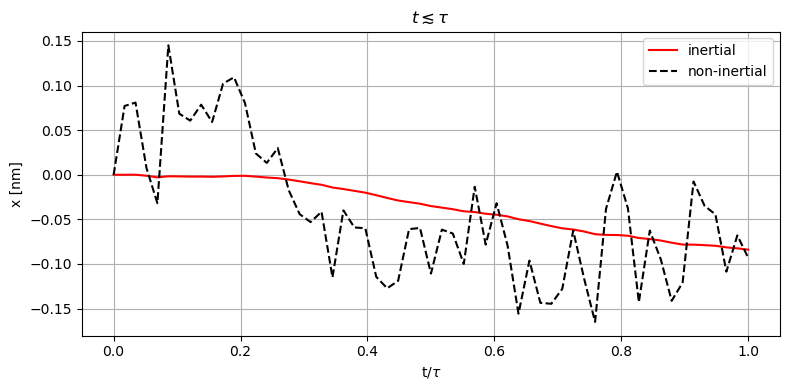

In [6]:
plt.figure(figsize=(8, 4))

# Regimen inercial
plt.plot(time, 1e9*x_inertial, 'r-', label='inertial')

# Regimen difusivo
plt.plot(time, 1e9*x_diffusive, 'k--', label='non-inertial')

plt.xlabel(r't/$\tau$')
plt.ylabel('x [nm]')

plt.title(r'$ t \lesssim \tau$')

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

#### Times longer than the inertial time t $\gg$ $\tau$

In [7]:
Time=100*tau

N = int(Time / Dt)
t = np.linspace(0, Time, N)
w = np.random.normal(0, 1, N)

# Inertial regime
x_inertial = np.zeros(N)
x_inertial[0] = 0
x_inertial[1] = 0

for i in range(2, N):
        x_inertial[i] = ((2 + Dt * gamma / m) / (1 + Dt * gamma / m)) * x_inertial[i-1] - (1 / (1 + Dt * gamma / m)) * x_inertial[i-2] + (np.sqrt(2 * KB * T * gamma) / (m*(1 + Dt * gamma/m))) * w[i] * Dt**(3/2)

# Diffusive regime
x_diffusive = np.zeros(N)
x_diffusive[0] = 0

for i in range(1, N):
    x_diffusive[i]=x_diffusive[i-1] + np.sqrt(2*D*Dt)*w[i]

In [8]:
time=t/tau

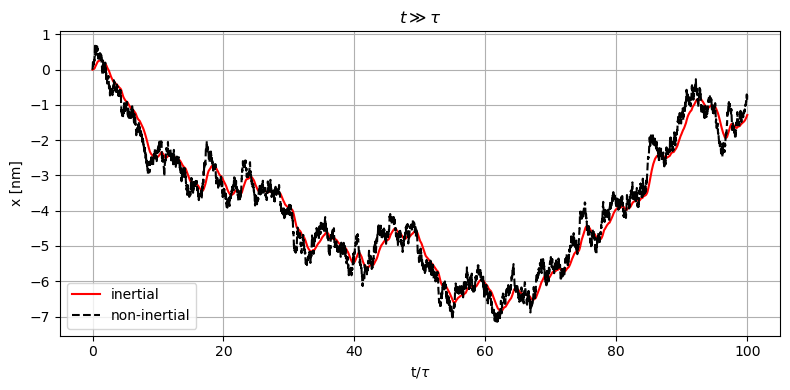

In [9]:
plt.figure(figsize=(8, 4))

# Regimen inercial
plt.plot(time, 1e9*x_inertial, 'r-', label='inertial')

# Regimen difusivo
plt.plot(time, 1e9*x_diffusive, 'k--', label='non-inertial')

plt.xlabel(r't/$\tau$')
plt.ylabel('x [nm]')

plt.title(r'$t \gg \tau$')

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

#### Velocity autocorrelation function

In [10]:
# velocity autocorrelation function

Time=500*tau

N = int(Time / Dt)
t = np.linspace(0, Time, N)
w = np.random.normal(0, 1, N)

# Inertial regime
x_inertial = np.zeros(N)
x_inertial[0] = 0
x_inertial[1] = 0

for i in range(2, N):
        x_inertial[i] = ((2 + Dt * gamma / m) / (1 + Dt * gamma / m)) * x_inertial[i-1] - (1 / (1 + Dt * gamma / m)) * x_inertial[i-2] + (np.sqrt(2 * KB * T * gamma) / (m*(1 + Dt * gamma/m))) * w[i] * Dt**(3/2)

# Diffusive regime
x_diffusive = np.zeros(N)
x_diffusive[0] = 0

for i in range(1, N):
    x_diffusive[i]=x_diffusive[i-1] + np.sqrt(2*D*Dt)*w[i]

In [11]:
def acf(x, Dt):

    v = (x[1:] - x[:-1]) / Dt
    #v = v - np.mean(v)
    r_full = np.correlate(v, v, mode='full') / len(v)
    
    mid = len(r_full) // 2  # the mean value corresponds to t=0
    
    
    r = r_full / np.max(np.abs(r_full))  # normalize to 1

    t = Dt * (np.arange(-mid, mid + 1))  # time goes from -t_max a +t_max
    
    time = t / tau
    
    return r, time

In [12]:
r_diffusive, time_diffusive = acf(x_diffusive, Dt)
r_inertial, time_inertial = acf(x_inertial, Dt)

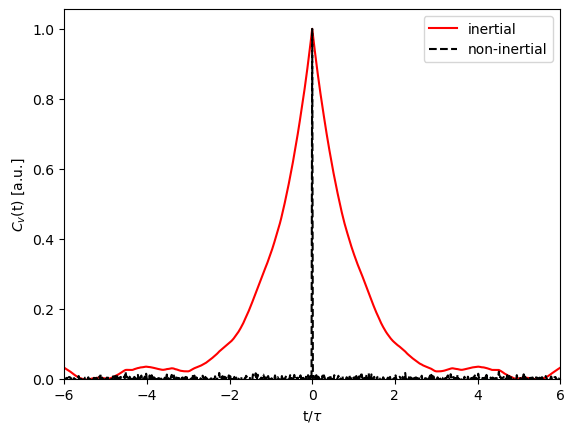

In [13]:
plt.plot(time_inertial, r_inertial, 'r-', label='inertial')
plt.plot(time_diffusive, r_diffusive,'k--', label='non-inertial')
plt.xlim(-6,6)
plt.ylim(0)
plt.xlabel(r't/$\tau$')
plt.ylabel('$C_v$(t) [a.u.]')
plt.legend()

#### Mean square displacement

In [14]:
# mean square displacement

Time=10000*tau

N = int(Time / Dt)
t = np.linspace(0, Time, N)
w = np.random.normal(0, 1, N)

# Inertial regime
x_inertial = np.zeros(N)
x_inertial[0] = 0
x_inertial[1] = 0

for i in range(2, N):
        x_inertial[i] = ((2 + Dt * gamma / m) / (1 + Dt * gamma / m)) * x_inertial[i-1] - (1 / (1 + Dt * gamma / m)) * x_inertial[i-2] + (np.sqrt(2 * KB * T * gamma) / (m*(1 + Dt * gamma/m))) * w[i] * Dt**(3/2)

# Diffusive regime
x_diffusive = np.zeros(N)
x_diffusive[0] = 0

for i in range(1, N):
    x_diffusive[i]=x_diffusive[i-1] + np.sqrt(2*D*Dt)*w[i]

In [15]:
def MSD(x, Dt):
    x = np.array(x)
    max_n = int(np.sqrt(len(x)))

    msd = []

    for n in range(max_n + 1):
        displacements = x[n:] - x[:len(x) - n]
        squared_displacements = displacements**2
        msd.append(np.mean(squared_displacements))

    t = Dt * np.arange(len(msd))
    time = t / tau
    
    return msd, time

In [16]:
MSD_inertial, t_inertial= MSD(x_inertial, Dt)
MSD_diffusive, t_diffusive= MSD(x_diffusive, Dt)

In [17]:
MSD_inertial=np.array(MSD_inertial)
MSD_diffusive=np.array(MSD_diffusive)

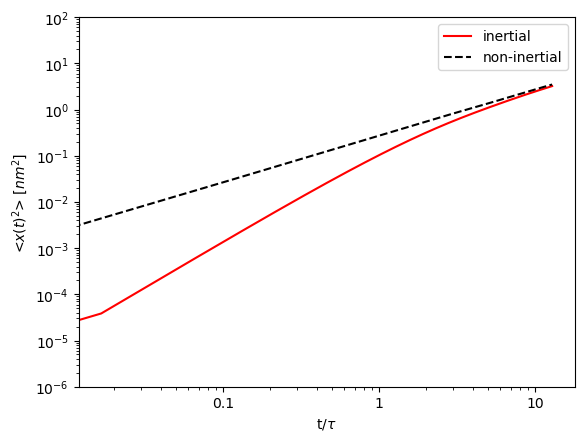

In [18]:
plt.plot(t_inertial, MSD_inertial*1e18, 'r-', label='inertial')
plt.plot(t_diffusive, MSD_diffusive*1e18, 'k--', label='non-inertial')

plt.xlabel(r't/$\tau$')
plt.xscale('log')
plt.xticks([0.1, 1, 10], ['0.1', '1', '10'])

plt.ylim(1e-6,1e2)
plt.ylabel('<$x(t)^2$> [$nm^2$]')
plt.yscale('log')
plt.legend()